# Lecture 5 Python Practice

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Support Vector Machine


In [2]:
from sklearn.svm import LinearSVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

linear_svm = LinearSVC().fit(X, y)

Text(0, 0.5, 'Feature 1')

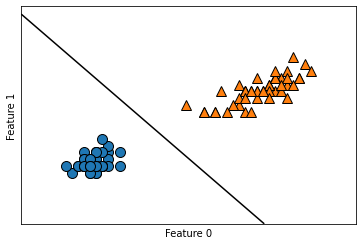

In [3]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

linear_svc = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X,y)

#define a list of parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc = GridSearchCV(linear_svc, params_svc, cv=5, n_jobs=2,scoring = 'roc_auc', return_train_score=True)
grid_svc.fit(X_train, y_train)

print('train score: ', grid_svc.score(X_train, y_train))
print('test score: ', grid_svc.score(X_train, y_train))
print(grid_svc.best_params_)

train score:  1.0
test score:  1.0
{'C': 0.001}


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

print(cancer.DESCR)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


In [7]:
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc_kernel.fit(X_train, y_train)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))
print(grid_svc_kernel.best_params_)



train score:  0.9983275622453066
test score:  0.9983275622453066
{'C': 1, 'gamma': 0.001}


## Naive Bayes

In [8]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
print(clf.predict(X[2:3]))

[3]


In [9]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([[2, -1]]))
print(clf.predict_proba([[2, -1]]))

[2]
[[0.49999996 0.50000004]]
